## Introduction

Unhappy customers don't stick around. What's more, unhappy customers rarely voice their dissatisfaction before leaving.

Santander Bank is asking Kagglers to help them identify dissatisfied customers early in their relationship. Doing so would allow Santander to take proactive steps to improve a customer's happiness before it's too late.

In this competition, you'll work with hundreds of anonymized features to predict if a customer is satisfied or dissatisfied with their banking experience.

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv(r'data/train.csv')

In [3]:
# Identify columns with missing values
missing_cols = df_train.columns[df_train.isna().any()].tolist()

# Print the columns with missing values
#There is no missing values!
print(missing_cols)

[]


In [4]:
df_train.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
#There are no categorical columns
cat_cols = df_train.select_dtypes(include=['object']).columns.tolist()
cat_cols

[]

In [6]:
def correlation_matrix(chunk):
    """
    A function that calculates the correlation matrix for a chunk of data
    Parameters:
    - chunk : pandas dataframe : A chunk of data from a large dataset
    """
    return chunk.corr()

# Initialize an empty DataFrame to store the correlation matrix
corr = pd.DataFrame()

# Open the large dataset in chunks
for chunk in pd.read_csv(r"data/train.csv", chunksize=1000):
    # Calculate the correlation matrix for the current chunk
    corr_chunk = correlation_matrix(chunk)
    # Append the correlation matrix to the final DataFrame
    corr = corr.append(corr_chunk)

In [7]:
#print the correlation matrix
print(corr)

                               ID      var3     var15  imp_ent_var16_ult1  \
ID                       1.000000 -0.031401  0.003751            0.043438   
var3                    -0.031401  1.000000  0.001504            0.002343   
var15                    0.003751  0.001504  1.000000            0.041026   
imp_ent_var16_ult1       0.043438  0.002343  0.041026            1.000000   
imp_op_var39_comer_ult1  0.016661  0.006144  0.120504            0.049376   
...                           ...       ...       ...                 ...   
saldo_medio_var44_hace3       NaN       NaN       NaN                 NaN   
saldo_medio_var44_ult1        NaN       NaN       NaN                 NaN   
saldo_medio_var44_ult3        NaN       NaN       NaN                 NaN   
var38                   -0.245029  0.013737  0.023217                 NaN   
TARGET                  -0.320076 -0.076472  0.692289                 NaN   

                         imp_op_var39_comer_ult1  imp_op_var39_comer_ult3  

In [8]:
# Set the threshold
threshold = 0.17

selected_cols = corr['TARGET'].loc[(corr['TARGET']>threshold)&(corr['TARGET']!=1)].index.tolist()

In [9]:
selected_cols.append('TARGET')

In [10]:
df_train = df_train[selected_cols]

<ipython-input-12-474a5d705f43>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))


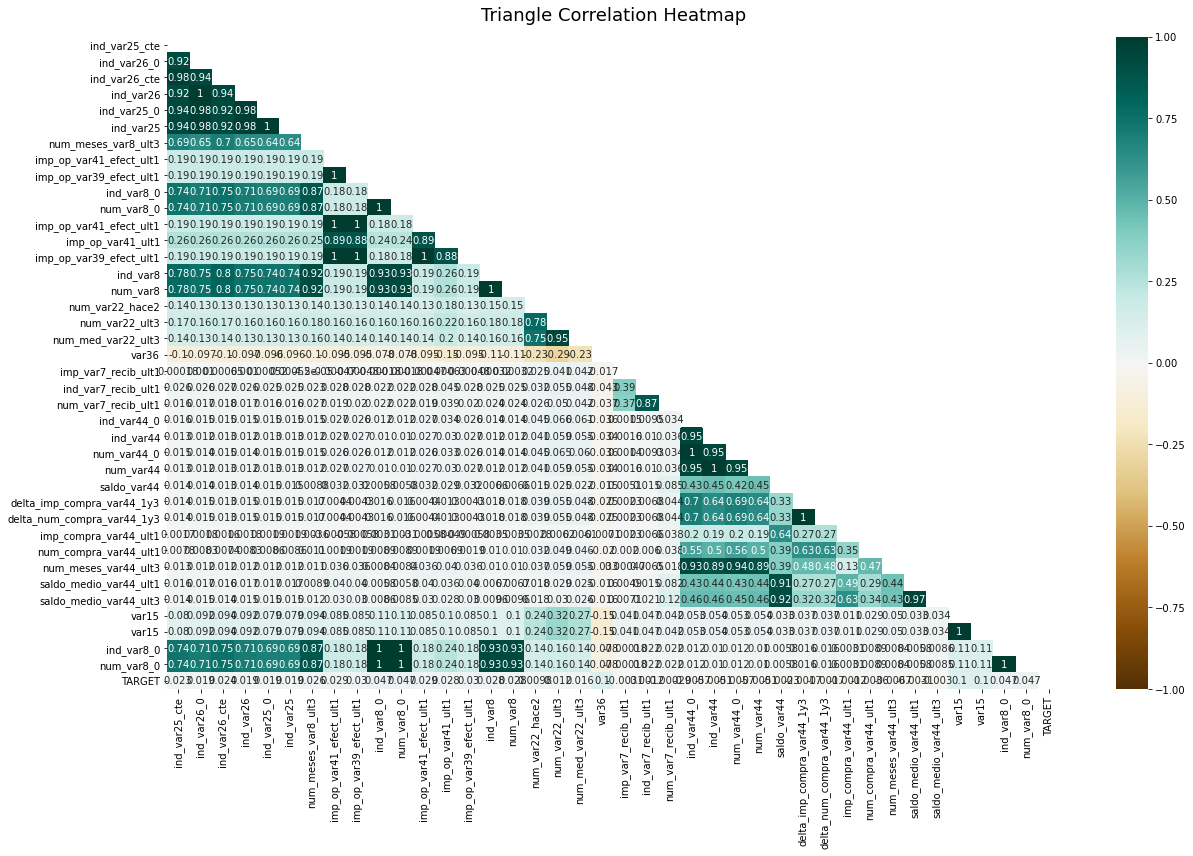

In [12]:
#Triangle Correlation Heatmap:
plt.figure(figsize=(20, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [13]:
len(df_train.columns)

40

In [14]:
def remove_multicollinearity(data, threshold):
    # calculate the correlation matrix
    corr_matrix = data.corr().abs()
    
    # select upper triangle of correlation matrix
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # find index of feature columns with correlation greater than threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    # drop correlated features
    data = data.drop(data[to_drop], axis=1)
    
    return data

In [15]:
df_train = remove_multicollinearity(df_train, threshold=0.8)

<ipython-input-14-72f8b710b0cd>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [19]:
df_train.columns

Index(['ind_var25_cte', 'num_meses_var8_ult3', 'num_var22_hace2',
       'num_var22_ult3', 'var36', 'imp_var7_recib_ult1', 'ind_var7_recib_ult1',
       'ind_var44_0', 'saldo_var44', 'delta_imp_compra_var44_1y3',
       'imp_compra_var44_ult1', 'num_compra_var44_ult1', 'TARGET'],
      dtype='object')

<ipython-input-17-474a5d705f43>:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))


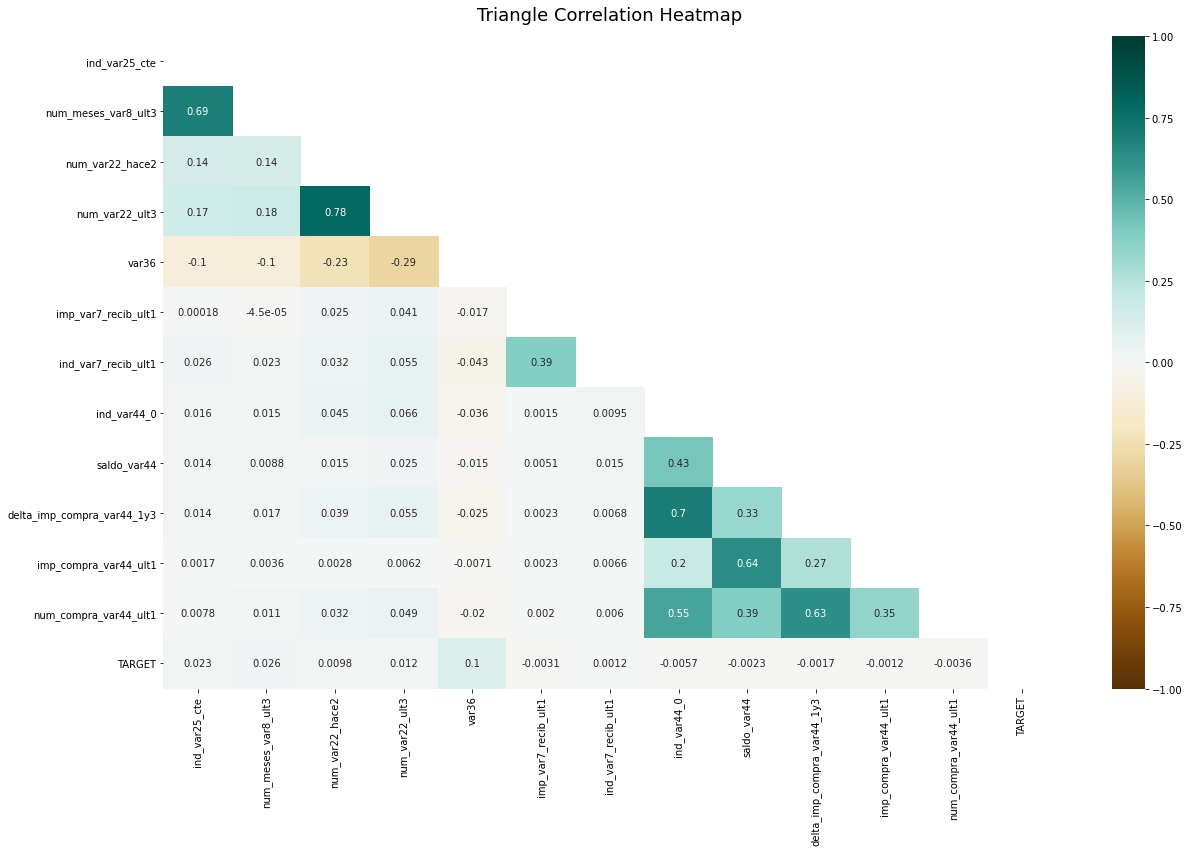

In [17]:
#Triangle Correlation Heatmap:
plt.figure(figsize=(20, 12))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df_train.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_train.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [20]:
df_test = pd.read_csv(r'data/test.csv')

In [21]:
# Identify columns with missing values
missing_cols = df_test.columns[df_test.isna().any()].tolist()

# Print the columns with missing values
#There is no missing values!
print(missing_cols)

[]


In [22]:
from sklearn.model_selection import train_test_split

# load data into X and y variables
X = df_train.drop(['TARGET'], axis=1)
y = df_train['TARGET']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import numpy as np

def train_random_forest(X_train, y_train, X_test, y_test):
    # Define the parameter grid
    param_grid = {'n_estimators': [10, 50, 100, 200],
                  'max_depth': [None, 5, 10, 20],
                  'min_samples_split': [2, 5, 10],
                  'min_samples_leaf': [1, 2, 4]}
    
    # Create the random forest classifier
    rf = RandomForestClassifier()
    
    # Create the grid search
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
    
    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)
    
    # Get the best estimator
    best_estimator = grid_search.best_estimator_
    
    # Predict the test set labels
    y_pred = best_estimator.predict(X_test)
    
    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    return best_estimator, accuracy

In [24]:
# usage example:
best_rf, accuracy = train_random_forest(X_train, y_train, X_test, y_test)

In [25]:
best_rf

RandomForestClassifier(max_depth=20, min_samples_leaf=2, min_samples_split=5,
                       n_estimators=10)

In [26]:
accuracy

0.9600105235464351